In [111]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

# City of Chicago Crime Data 2001 to Present 
## Domestic Violence Incidents by Day, Week, Month, Day of the Week and Year

### Step 1: Read in Dataset from City of Chicago Data Portal

In [112]:
data = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/Crimes_-_2001_to_present.csv")
data.head()

,Date,Domestic,Year
0,03/21/2006 07:40:00 AM,True,2006
1,03/22/2006 11:42:00 AM,True,2006
2,03/21/2006 06:00:00 PM,True,2006
3,03/20/2006 07:00:00 PM,True,2006
4,03/19/2006 07:00:00 PM,True,2006


### Step 2: Obtain index range and column names and verify if the dataset contains any null values.

In [113]:
pd.isnull(data).sum()

Date        0
Domestic    0
Year        0
dtype: int64

In [114]:
data.shape

(803355, 3)

In [115]:
data.index 

RangeIndex(start=0, stop=803355, step=1)

In [116]:
data.columns.tolist()

['Date', 'Domestic', 'Year']

### Step 3: Format dates: Drop time from "Date" and transform "Date" column into datetime.  Delete "Year" column

In [117]:
data['Date'] = pd.to_datetime(data['Date']).dt.date

In [118]:
data.head()

,Date,Domestic,Year
0,2006-03-21,True,2006
1,2006-03-22,True,2006
2,2006-03-21,True,2006
3,2006-03-20,True,2006
4,2006-03-19,True,2006


In [119]:
del data['Year']

In [120]:
data['Date'] = pd.to_datetime(data.Date)

In [121]:
data.dtypes

Date        datetime64[ns]
Domestic              bool
dtype: object

### Step 4: Create "Day of Week", "Month" and "Year" Columns 

In [141]:
data['day_of_week'] = data['Date'].dt.dayofweek

In [125]:
data['Month'] = data['Date'].dt.month

In [126]:
data['Year'] = data['Date'].dt.year

In [127]:
data['Day'] = data['Date'].dt.day

In [128]:
data.Domestic = data.Domestic.astype(int)

In [142]:
data.head()

,Date,Domestic,day_of_week,Month,Year,Day
0,2006-03-21,1,1,3,2006,21
1,2006-03-22,1,2,3,2006,22
2,2006-03-21,1,1,3,2006,21
3,2006-03-20,1,0,3,2006,20
4,2006-03-19,1,6,3,2006,19


### Step 5: Create Train Set by setting aside 2014 - Present data.  Obtain shape.

#### There are 679125 observations in the Train dataset.

In [145]:
train = (data['Date'] >= '2001-01-01') & (data['Date'] <= '2013-12-31')

In [146]:
ts = data.loc[train]

In [147]:
ts.head()

,Date,Domestic,day_of_week,Month,Year,Day
0,2006-03-21,1,1,3,2006,21
1,2006-03-22,1,2,3,2006,22
2,2006-03-21,1,1,3,2006,21
3,2006-03-20,1,0,3,2006,20
4,2006-03-19,1,6,3,2006,19


In [151]:
ts.shape

(679125, 6)

In [152]:
ts.dtypes

Date           datetime64[ns]
Domestic                int64
day_of_week             int64
Month                   int64
Year                    int64
Day                     int64
dtype: object

### Step 6: Crosstab Day of Week and Year - Describe, Visualize
#### Saturday and Sunday have above average number of incidents compared to other days of the week, in all 14 years.

In [148]:
DoWYear = pd.crosstab(ts['day_of_week'], ts['Year'], rownames=['day_of_week'])
DoWYear

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
day_of_week,,,,,,,,,,,,,
0,8301,8371,7350,7373,7148,7000,7165,6673,7284,7076,6874,6760,6135
1,7691,8331,7163,7046,6595,6731,6609,6711,7011,7015,6598,6535,5999
2,7723,7985,7257,7107,6561,6762,6735,6517,7045,6869,6267,6517,5923
3,7517,7982,6919,7408,6401,6622,6573,6548,7163,6906,6379,6298,5869
4,7991,8524,7300,7746,6985,6986,6890,7046,7341,7435,6883,6577,6120
5,9735,9939,8856,8663,8395,8282,8254,8403,8345,7974,8201,7541,7145
6,9728,10054,8975,9118,8637,8918,8699,8550,8758,8528,8263,8294,7648


In [153]:
DoWYear.describe()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,8383.714286,8740.857143,7688.571429,7780.142857,7246.000000,7328.714286,7275.000000,7206.857143,7563.857143,7400.428571,7066.428571,6931.714286,6405.571429
std,954.090617,881.180918,850.306387,802.787525,907.364131,897.957073,853.863963,885.206083,695.185450,630.116618,828.731934,720.338280,698.954900
min,7517.000000,7982.000000,6919.000000,7046.000000,6401.000000,6622.000000,6573.000000,6517.000000,7011.000000,6869.000000,6267.000000,6298.000000,5869.000000
25%,7707.000000,8158.000000,7210.000000,7240.000000,6578.000000,6746.500000,6672.000000,6610.500000,7104.000000,6960.500000,6488.500000,6526.000000,5961.000000
50%,7991.000000,8371.000000,7300.000000,7408.000000,6985.000000,6986.000000,6890.000000,6711.000000,7284.000000,7076.000000,6874.000000,6577.000000,6120.000000
75%,9014.500000,9231.500000,8103.000000,8204.500000,7771.500000,7641.000000,7709.500000,7724.500000,7843.000000,7704.500000,7542.000000,7150.500000,6640.000000
max,9735.000000,10054.000000,8975.000000,9118.000000,8637.000000,8918.000000,8699.000000,8550.000000,8758.000000,8528.000000,8263.000000,8294.000000,7648.000000


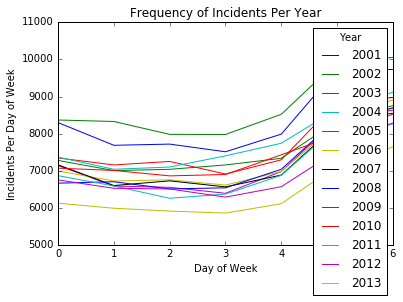

In [150]:
DoWYear.plot(title='Frequency of Incidents Per Year')
plt.xlabel('Day of Week')
plt.ylabel('Incidents Per Day of Week')

### Step 7: Crosstab Date and Domestic - Describe, Visualize
#### Mean number of incidents per day = 143.03.  Standard deviation is 29.78.  New Years Day appears twelve times in the days with the most incidents with a range of 251-343, greater than two standard deviations higher than mean incidents/day.

In [26]:
Day = pd.crosstab(ts["Date"], ts['Domestic'], rownames=['Date'])
Day.head()

Domestic,1
Date,
2001-01-01,281
2001-01-02,146
2001-01-03,162
2001-01-04,131
2001-01-05,159


In [27]:
Day.describe()

Domestic,1
count,4748.000000
mean,143.033909
std,29.786275
min,68.000000
25%,122.000000
50%,140.000000
75%,160.250000
max,343.000000


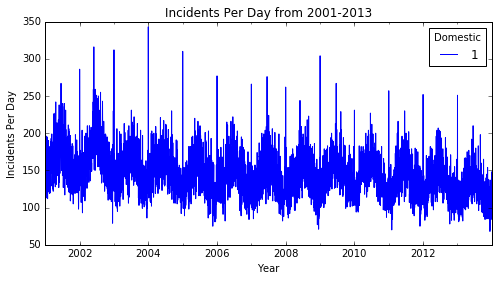

In [164]:
Day.plot(figsize=(8,4), title='Incidents Per Day from 2001-2013')
plt.xlabel('Year')
plt.ylabel('Incidents Per Day')

In [155]:
DayCount = ts.groupby('Date').count()
DayCount.nlargest(30, "Domestic")

,Domestic,day_of_week,Month,Year,Day
Date,,,,,
2004-01-01,343,343,343,343,343
2002-06-01,316,316,316,316,316
2003-01-01,312,312,312,312,312
2005-01-01,310,310,310,310,310
2009-01-01,304,304,304,304,304
2002-01-01,286,286,286,286,286
2001-01-01,281,281,281,281,281
2006-01-01,277,277,277,277,277
2007-06-17,276,276,276,276,276


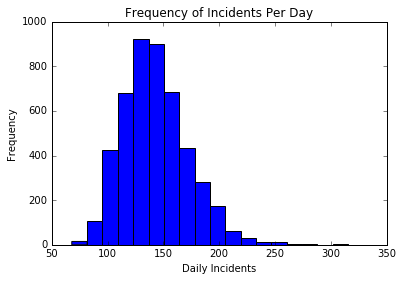

In [156]:
DayCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Day')
plt.xlabel('Daily Incidents')
plt.ylabel('Frequency')

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a28a978>],
 'caps': [<matplotlib.lines.Line2D at 0x11a27fac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x118756a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a27bb38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a28ab00>,
  <matplotlib.lines.Line2D at 0x11a27f9b0>]}

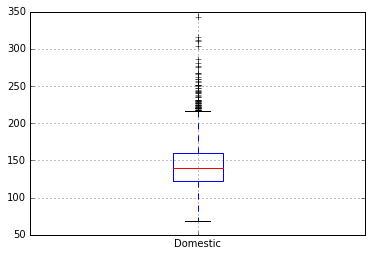

In [30]:
DayCount.boxplot(['Domestic'])

### Step 8:  Group by Day of the Week for entire DataSet - Describe and Vizualize
#### Just as Saturday and Sunday had the highest average number of incidents each year, they have the highest average across the entire dataset.

In [31]:
DoWCount = ts.groupby('day_of_week').count()

In [32]:
DoWCount.describe()

,Date,Domestic,Month,Year,Day
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,97017.857143,97017.857143,97017.857143,97017.857143,97017.857143
std,10474.654385,10474.654385,10474.654385,10474.654385,10474.654385
min,88585.000000,88585.000000,88585.000000,88585.000000,88585.000000
25%,89651.500000,89651.500000,89651.500000,89651.500000,89651.500000
50%,93510.000000,93510.000000,93510.000000,93510.000000,93510.000000
75%,101778.500000,101778.500000,101778.500000,101778.500000,101778.500000
max,114170.000000,114170.000000,114170.000000,114170.000000,114170.000000


In [33]:
DoWCount.nlargest(7, "Domestic")

,Date,Domestic,Month,Year,Day
day_of_week,,,,,
Sunday,114170,114170,114170,114170,114170
Saturday,109733,109733,109733,109733,109733
Friday,93824,93824,93824,93824,93824
Monday,93510,93510,93510,93510,93510
Tuesday,90035,90035,90035,90035,90035
Wednesday,89268,89268,89268,89268,89268
Thursday,88585,88585,88585,88585,88585


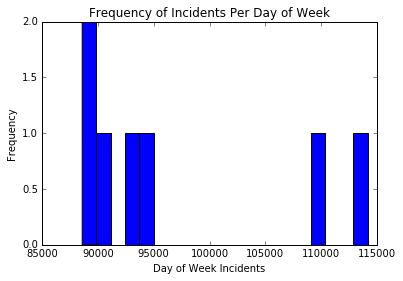

In [166]:
DoWCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Day of Week')
plt.xlabel('Day of Week Incidents')
plt.ylabel('Frequency')

### Step 9: Crosstab Month and Year and Group by Month 
#### May through August have highest number of incidents per month, throughout entire period.  July 2002 had the overall highest number of incidents-6062 incidents-and the most oncidents across 13 year period - 64,986.  There is a general trend downward in incidents of domestic violence over the 13 years.

In [35]:
MY = pd.crosstab(ts['Month'], ts['Year'], rownames=['Month'])
MY

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,
1,4710,4637,4224,4222,3959,4073,3845,3905,4075,3838,3788,3753,3541
2,4242,4083,3607,4301,3740,3650,3550,3559,3698,3518,3248,3468,3094
3,5078,5114,4521,4898,4099,4061,4365,4196,4477,4640,4157,4330,3879
4,5145,5133,4784,4733,4583,4502,4367,4203,4367,4549,4425,4000,3954
5,5412,5907,4769,5173,4981,4720,4808,4500,5043,4896,4572,4574,4166
6,5709,6062,4823,4812,4884,4663,4829,4632,4941,4863,4645,4671,4277
7,5340,6061,5262,4992,4862,5107,4797,4888,4781,4994,4883,4811,4208
8,5130,5348,5176,4724,4417,4617,4593,4723,4911,4689,4287,4305,4055
9,4757,4932,4466,4559,4111,4191,4363,4378,4469,4215,3897,3867,3774


In [36]:
MY.describe()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4890.500000,5098.833333,4485.000000,4538.416667,4226.833333,4275.083333,4243.75000,4204.000000,4412.250000,4316.916667,4122.083333,4043.500000,3736.583333
std,479.812937,647.076900,506.985207,426.333301,521.631328,441.817827,480.33362,442.326083,436.025046,527.552058,462.668634,479.079325,420.371580
min,4242.000000,4083.000000,3607.000000,3825.000000,3437.000000,3650.000000,3533.00000,3490.000000,3698.000000,3518.000000,3248.000000,3468.000000,3094.000000
25%,4405.250000,4676.750000,4176.500000,4281.250000,3904.250000,4006.250000,3820.75000,3931.250000,4093.750000,3842.500000,3815.750000,3655.750000,3404.500000
50%,4917.500000,5023.000000,4493.500000,4641.500000,4105.000000,4133.500000,4364.00000,4199.500000,4418.000000,4382.000000,4081.000000,3933.500000,3826.500000
75%,5193.750000,5487.750000,4793.750000,4833.500000,4652.750000,4628.500000,4644.00000,4533.000000,4813.500000,4732.500000,4461.750000,4391.000000,4082.750000
max,5709.000000,6062.000000,5262.000000,5173.000000,4981.000000,5107.000000,4829.00000,4888.000000,5043.000000,4994.000000,4883.000000,4811.000000,4277.000000


In [37]:
MY.max()

Year
2001    5709
2002    6062
2003    5262
2004    5173
2005    4981
2006    5107
2007    4829
2008    4888
2009    5043
2010    4994
2011    4883
2012    4811
2013    4277
dtype: int64

In [38]:
MonthCount = ts.groupby('Month').count()

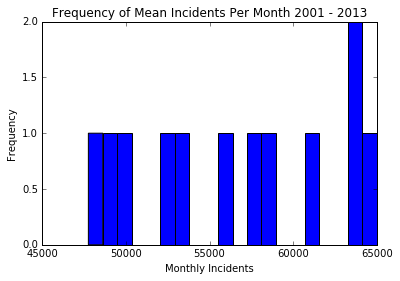

In [39]:
MonthCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Mean Incidents Per Month 2001 - 2013')
plt.xlabel('Monthly Incidents')
plt.ylabel('Frequency')

In [40]:
MonthCount.nlargest(12, "Domestic")

,Date,Domestic,day_of_week,Year,Day
Month,,,,,
7,64986,64986,64986,64986,64986
6,63811,63811,63811,63811,63811
5,63521,63521,63521,63521,63521
8,60975,60975,60975,60975,60975
4,58745,58745,58745,58745,58745
3,57815,57815,57815,57815,57815
9,55979,55979,55979,55979,55979
10,53636,53636,53636,53636,53636
1,52570,52570,52570,52570,52570


### Step 10: Crosstab Year - Describe & Visualize
#### There is a downward in incidents of domestic violence over the 13 years.

In [58]:
Year = pd.crosstab(ts.Year, ts.Domestic)

In [59]:
Year

Domestic,1
Year,
2001,58686
2002,61186
2003,53820
2004,54461
2005,50722
2006,51301
2007,50925
2008,50448
2009,52947


In [62]:
Year.describe()

Domestic,1
count,13.000000
mean,52240.384615
std,4224.209720
min,44839.000000
25%,50448.000000
50%,51301.000000
75%,53820.000000
max,61186.000000


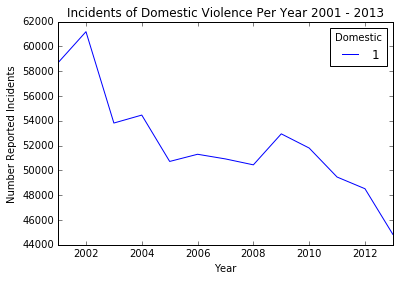

In [61]:
Year.plot(title='Incidents of Domestic Violence Per Year 2001 - 2013')
plt.xlabel('Year')
plt.ylabel('Number Reported Incidents')

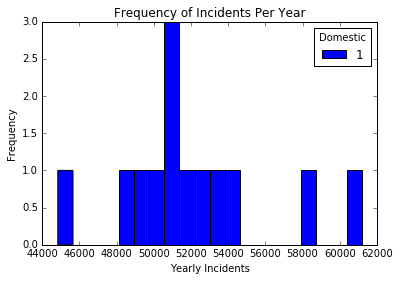

In [64]:
Year.plot(kind='hist', bins=20, title='Frequency of Incidents Per Year')
plt.xlabel('Yearly Incidents')
plt.ylabel('Frequency')

### Step 11: Crosstab by day and Month - Describe & Visualize --Note that "zeros" were automatically imputed to create data points for 31 days in each month.
#### Plot shows that the number of incidents per day stays fairly steady throughout the month.  There are few clear peaks: January 1, July 4 and 5, and Mid-June.


In [47]:
DM = pd.crosstab(ts['Day'], ts['Month'], rownames=['Day'])
DM

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
1,3632,1853,2023,2262,2240,2440,2303,2249,2361,1997,1952,1784
2,1677,1582,1781,1983,1998,2160,2025,2099,2090,1864,1722,1560
3,1766,1612,1811,1854,1919,1999,2158,2059,1996,1700,1671,1521
4,1666,1698,1843,1910,1999,1888,2691,2071,1911,1754,1703,1554
5,1663,1680,1744,1819,2091,1868,2441,2124,1914,1746,1619,1474
6,1704,1559,1775,1925,1982,1982,2092,2074,1973,1732,1629,1551
7,1697,1649,1786,1885,2058,2059,2062,2032,1910,1679,1699,1532
8,1680,1631,1743,1928,2036,2159,2178,1976,1928,1813,1707,1511
9,1580,1628,1839,1823,2156,2171,2074,1966,1853,1798,1726,1453


In [48]:
DM.describe()

Month,1,2,3,4,5,6,7,8,9,10,11,12
count,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1695.806452,1540.580645,1865.00000,1895.000000,2049.064516,2058.419355,2096.322581,1966.935484,1805.774194,1730.193548,1608.516129,1595.645161
std,366.903477,473.918191,74.41774,366.093066,84.433775,400.693380,152.243749,96.811134,359.887270,80.681026,309.407161,131.468259
min,1454.000000,0.000000,1743.00000,0.000000,1919.000000,0.000000,1938.000000,1819.000000,0.000000,1607.000000,0.000000,1421.000000
25%,1576.000000,1620.000000,1807.00000,1905.500000,1992.500000,2052.500000,2000.500000,1906.500000,1772.500000,1676.500000,1614.000000,1519.500000
50%,1658.000000,1678.000000,1872.00000,1933.000000,2025.000000,2122.000000,2058.000000,1946.000000,1840.000000,1712.000000,1660.000000,1559.000000
75%,1679.000000,1737.000000,1920.50000,1993.000000,2108.500000,2179.000000,2136.500000,2017.500000,1919.000000,1775.500000,1701.000000,1622.500000
max,3632.000000,1857.000000,2023.00000,2262.000000,2240.000000,2440.000000,2691.000000,2249.000000,2361.000000,1997.000000,1952.000000,2105.000000


In [49]:
DM.sum()

Month
1     52570
2     47758
3     57815
4     58745
5     63521
6     63811
7     64986
8     60975
9     55979
10    53636
11    49864
12    49465
dtype: int64

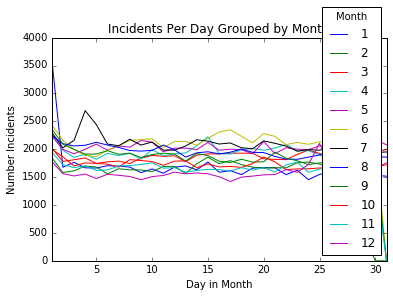

In [69]:
DM.plot(title='Incidents Per Day Grouped by Month')
plt.xlabel('Day in Month')
plt.ylabel('Number Incidents')

### Step 12: Groupby TimeGrouper by Week- Describe 
#### Mean is about 1,000 incidents per week.  Largest number of mean incidents occured in May though July.  Most of the smallest number of mean incidents occured in December and January.  Plot shows there is some seasonality.

In [87]:
ChicagoWeekCount = DayCount.groupby(pd.TimeGrouper(freq='W')).sum()

In [88]:
ChicagoWeekCount.head()

,Domestic,day_of_week,Month,Year,Day
Date,,,,,
2001-01-07,1234,1234,1234,1234,1234
2001-01-14,1043,1043,1043,1043,1043
2001-01-21,1055,1055,1055,1055,1055
2001-01-28,975,975,975,975,975
2001-02-04,1059,1059,1059,1059,1059


In [89]:
ChicagoWeekCount.describe()

,Domestic,day_of_week,Month,Year,Day
count,679.000000,679.000000,679.000000,679.000000,679.000000
mean,1000.184094,1000.184094,1000.184094,1000.184094,1000.184094
std,144.640955,144.640955,144.640955,144.640955,144.640955
min,194.000000,194.000000,194.000000,194.000000,194.000000
25%,901.500000,901.500000,901.500000,901.500000,901.500000
50%,992.000000,992.000000,992.000000,992.000000,992.000000
75%,1089.500000,1089.500000,1089.500000,1089.500000,1089.500000
max,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000


In [90]:
ChicagoWeekCount.nlargest(10, 'Domestic')["Domestic"]

Date
2002-06-02    1658
2002-07-07    1519
2001-06-17    1511
2002-06-16    1435
2002-06-23    1415
2002-07-21    1408
2002-06-30    1392
2001-05-06    1364
2002-05-19    1347
2002-05-26    1340
Name: Domestic, dtype: int64

In [91]:
ChicagoWeekCount.nsmallest(10, 'Domestic')["Domestic"]

Date
2014-01-05    194
2013-12-15    646
2013-12-22    672
2005-12-11    695
2013-10-27    704
2011-02-06    712
2008-12-21    718
2012-01-22    721
2007-12-09    724
2013-12-08    724
Name: Domestic, dtype: int64

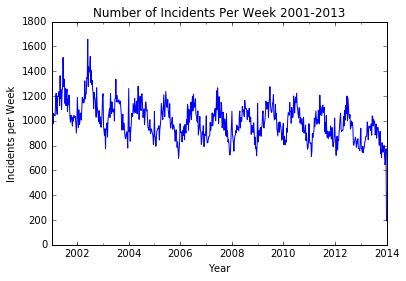

In [94]:
ChicagoWeekCount.Domestic.plot(title='Number of Incidents Per Week 2001-2013')
plt.xlabel('Year')
plt.ylabel('Incidents per Week')